In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 영국 온라인 스토어 도매 거래 데이터
df = pd.read_csv("../data/online_retail.csv", dtype={'CustomerID': str,'InvoiceID':str}
                 , encoding="ISO-8859-1")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
# 칼럼별 결측값 개수 구하기 : df.isnull().sum()
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# 결측치(누락데이터) 제거 : dropna()
df = df.dropna()
print(df.shape)

(406829, 8)


In [5]:
# 상품 수량이 음수인 경우를 제거합니다.
print(df[df['Quantity']<=0].shape[0])
df = df[df['Quantity']>0]

8905


In [6]:
# 상품 가격이 0 이하인 경우를 제거합니다.
print(df[df['UnitPrice']<=0].shape[0])
df = df[df['UnitPrice']>0]

40


In [7]:
# 상품 코드가 일반적이지 않은 경우를 탐색합니다.
# Any 조건중 하나라도 맞으면 True를 리턴한다.
# isdigit함수는 문자열이 숫자인지 아닌지를 True,False로 리턴
df['ContainDigit'] = df['StockCode'].apply(lambda x: any(c.isdigit() for c in x))
print(df[df['ContainDigit'] == False].shape[0])
df[df['ContainDigit'] == False].head()

1414


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,False
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,False
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany,False
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,False
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,False


In [8]:
# 상품 코드가 일반적이지 않은 경우를 제거합니다.
df = df[df['ContainDigit'] == True]

In [9]:
# 탐색적 데이터 분석(EDA) : 수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정입니다. 
# 한마디로 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정입니다.
# 거래 데이터에서 가장 오래된 데이터와 가장 최신의 데이터를 탐색합니다.
# dt.date : YYYY-MM-DD(문자)
df['date'] = df['InvoiceDate'].dt.date
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


<AxesSubplot:xlabel='date'>

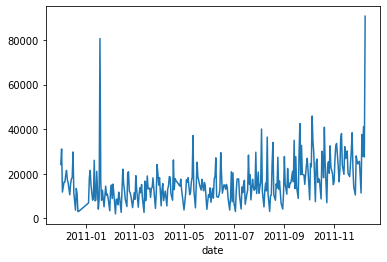

In [10]:
# 일자별 총 거래 수량을 탐색합니다.
date_quantity_series = df.groupby('date')['Quantity'].sum()
date_quantity_series.plot()

<AxesSubplot:xlabel='date'>

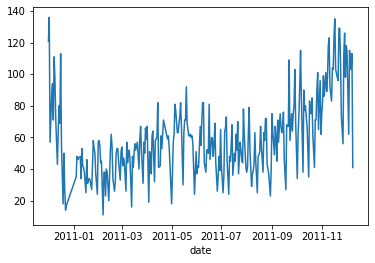

In [11]:
# 일자별 총 거래 횟수를 탐색합니다.
# nunique(): 유니크한 value의 개수를 나타냄
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
date_transaction_series.plot()

<AxesSubplot:xlabel='date'>

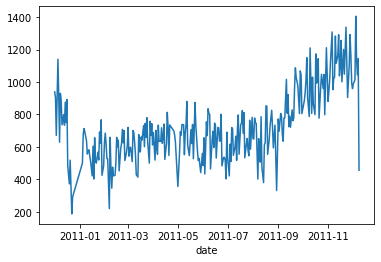

In [12]:
# 일자별 거래된 상품의 unique한 개수, 즉 상품 거래 다양성을 탐색합니다.
date_unique_item_series = df.groupby('date')['StockCode'].nunique()
date_unique_item_series.plot()

In [13]:
# 총 유저의 수를 계산하여 출력합니다.
# len(s)은 입력값 s의 길이(요소의 전체 개수)를 돌려주는 함수
print(len(df['CustomerID'].unique()))

4334


In [14]:
# 유저별 거래 횟수를 탐색합니다.
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
# describe() 요약 통계 정보 출력
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

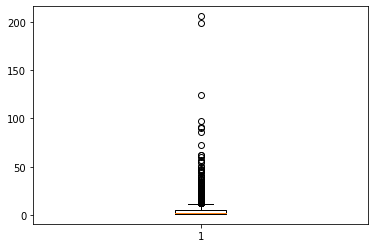

In [15]:
# 상자 그림 시각화로 살펴봅니다.
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [16]:
# 유저별 아이템 구매 종류 개수를 탐색합니다.
customer_unique_item_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_item_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

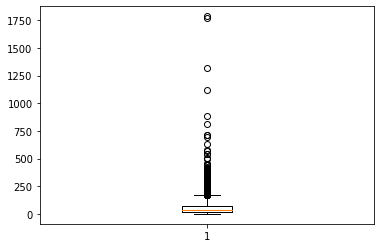

In [17]:
plt.boxplot(customer_unique_item_series.values)
plt.show()

In [18]:
import datetime

In [20]:
# 2011년 11월 기준으로 하여 기준 이전과 이후로 데이터를 분리합니다.
df_year_round = df[df['date'] < datetime.date(2011, 11 ,1)]
df_year_end = df[df['date'] >= datetime.date(2011, 11, 1)]
# shape : 행렬의 차원
print(df_year_round.shape)
print(df_year_end.shape)

(314902, 10)
(81568, 10)


In [21]:
# 11월 이전 데이터에서 구매했던 상품의 set(집합)을 추출합니다.
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {23506, 22196, 23503, 84997B, 22494, 23084, 23...
12348    {21726, 22951, 23076, 22437, 21985, 21980, 219...
12350    {20652, 21866, 22620, 22348, 21832, 21864, 219...
12352    {22423, 22779, 22646, 22138, 22720, 22722, 226...
                               ...                        
18280    {22725, 22495, 22611, 82484, 22467, 22499, 223...
18281    {22716, 22467, 22037, 23209, 23007, 22028, 23008}
18282    {21270, 23295, 22089, 21109, 21108, 22424, 23187}
18283    {23506, 23205, 22271, 22910, 84997B, 22898, 22...
18287    {23272, 21014, 22583, 23076, 22807, 47422, 213...
Name: StockCode, Length: 3970, dtype: object


In [22]:
# 11월 이전에 구매했는지 혹은 이후에 구매했는지를 유저별로 기록하기 위한 사전을 정의합니다.
customer_item_dict = {}

# 11월 이전에 구매한 상품은 'old'라고 표기합니다.
# items() - 사전 데이터(키와 값을 쌍)을 리턴
for customer_id, stocks in customer_item_round_set.items():
    customer_item_dict[customer_id] = {}
    for stock_code in stocks:
        customer_item_dict[customer_id][stock_code] = 'old'
        
print(str(customer_item_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'23506': 'old', '22196': 'old', '23503': 'old', '84997B': 'old...


In [23]:
# 11월 이후 데이터에서 구매하는 상품의 집합을 추출합니다.
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_end_set)

CustomerID
12347    {20719, 23506, 23271, 23552, 84625A, 23084, 21...
12349    {22423, 84078A, 21563, 22556, 22070, 22720, 22...
12352    {22178, 23088, 21669, 23089, 23367, 22668, 226...
12356                                       {22423, 21843}
12357    {22348, 22070, 22059, 22905, 22712, 22315, 727...
                               ...                        
18272    {22965, 22960, 22722, 72799C, 22993, 23113, 22...
18273                                             {79302M}
18274    {22423, 84509A, 22720, 21231, 23245, 23243, 21...
18282                  {22423, 23174, 22818, 23175, 22699}
18283    {23506, 23205, 22910, 22898, 23377, 23581, 225...
Name: StockCode, Length: 1904, dtype: object


In [24]:
# 11월 이전에 구매한 상품은 'old', 이후에만 구매한 상품은 'new', 모두 구매한 상품은 'both'라고 표기합니다.
# items() - 사전 데이터(키와 값을 쌍)을 리턴
for customer_id, stocks in customer_item_end_set.items():
    # 11월 이전 구매기록이 있는 유저인지 체크합니다.
    if customer_id in customer_item_dict:
        for stock_code in stocks:
            #구매한 적 있는 상품인지를 체크한 뒤, 상태를 표기합니다.
            if stock_code in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock_code] = 'both'
            else:
                customer_item_dict[customer_id][stock_code] = 'new'
    else:
        customer_item_dict[customer_id] = {}
        for stock_code in stocks:
            customer_item_dict[customer_id][stock_code] = 'new'
        
print(str(customer_item_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'23506': 'both', '22196': 'old', '23503': 'old', '84997B': 'ol...


In [25]:
# 'old', 'new', 'both'를 유저별로 탐색하여 데이터 프레임을 생성합니다.
columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)

# 데이터 프레임을 생성하는 과정입니다.
for customer_id in customer_item_dict:
    old = 0
    new = 0
    both = 0
    
    # 상품 상태(old, new, both)를 체크하여 데이터 프레임에 append할 수 있는 형태로 처리합니다.
    for stock_code in customer_item_dict[customer_id]:
        status = customer_item_dict[customer_id][stock_code]
        if status == 'old':
            old += 1
        elif status == 'new':
            new += 1
        else:
            both += 1
    
    # df_order_info에 데이터를 append합니다.
    row = [customer_id, old, new, both]
    series = pd.Series(row, index=columns)
    df_order_info = df_order_info.append(series, ignore_index=True)

df_order_info.head()
    

,CustomerID,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2


In [26]:
# 데이터 프레임에서 전체 유저 수를 출력합니다.
print(df_order_info.shape[0])

# 데이터 프레임에서 old가 1 이상이면서, new가 1 이상인 유저 수를 출력합니다.
# 11월 이후에 기존에 구매한 적 없는 새로운 상품을 구매한 유저를 의미합니다.
print(df_order_info[(df_order_info['old'] > 0) & (df_order_info['new'] > 0)].shape[0])

# 데이터 프레임에서 both가 1 이상인 유저 수를 출력합니다.
# 재구매한 상품이 있는 유저 수를 의마합니다.
print(df_order_info[df_order_info['both'] > 0].shape[0])

4334
1446
1426


In [27]:
# 만약 새로운 상품을 구매한다면 얼마나 많은 종류의 새로운 상품을 구매하는지 탐색합니다.
print(df_order_info['new'].value_counts()[1:].describe())

count    132.000000
mean      13.734848
std       19.130672
min        1.000000
25%        1.000000
50%        5.000000
75%       16.000000
max       81.000000
Name: new, dtype: float64


In [32]:
# 추천 대상 데이터에 포함되는 유저와 상품의 개수를 출력합니다.
print(len(df_year_round['CustomerID'].unique()))
print(len(df_year_round['StockCode'].unique()))

3970
3608


In [33]:
# Rating(선호도) 데이터를 생성하기 위한 탐색 : 유저-상품간 구매 횟수를 탐색합니다.
# 행 인덱스 초기화 : reset_index() 함수
uir_df = df_year_round.groupby(['CustomerID', 'StockCode'])['InvoiceNo'].nunique().reset_index()
uir_df.head()

,CustomerID,StockCode,InvoiceNo
0,12346,23166,1
1,12347,16008,1
2,12347,17021,1
3,12347,20665,1
4,12347,20719,3


<AxesSubplot:>

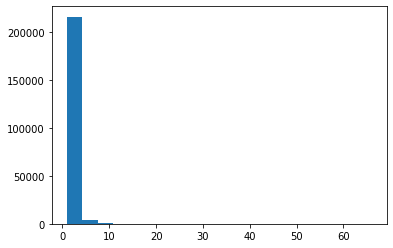

In [34]:
# Rating(InvoiceNo) 피처의 분포를 탐색합니다.
uir_df['InvoiceNo'].hist(bins=20, grid=False)

<AxesSubplot:>

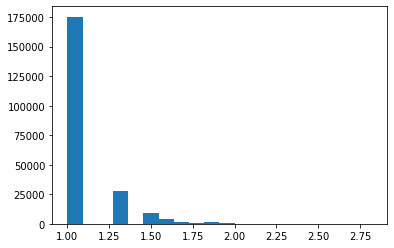

In [36]:
# 로그를 통한 피처 정규화 : 데이터의 왜도가 높은 경우에 데이터 사이에 편차를 줄여 왜도를 감소시키는데 사용
# Rating(InvoiceNo) 피처를 log normalization 해준 뒤, 다시 분포를 탐색합니다.
uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1).hist(bins=20, grid=False)

<AxesSubplot:>

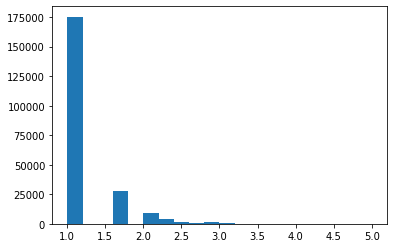

In [38]:
# 1~5 사이의 점수로 변환합니다. (최대-최소 스케일링 방법)
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1)
uir_df['Rating'] = ((uir_df['Rating'] - uir_df['Rating'].min()) / (uir_df['Rating'].max() - uir_df['Rating'].min()) * 4) + 1
uir_df['Rating'].hist(bins=20, grid=False)

In [39]:
# SVD 모델 학습을 위한 데이터셋을 생성합니다.
uir_df = uir_df[['CustomerID', 'StockCode', 'Rating']]
uir_df.head()

,CustomerID,StockCode,Rating
0,12346,23166,1.000000
1,12347,16008,1.000000
2,12347,17021,1.000000
3,12347,20665,1.000000
4,12347,20719,2.048881
